In [60]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.preprocessing import PowerTransformer
sns.set_theme(style='whitegrid')

In [61]:
# データの読み込み
path = '../../data/SPEEDA/CompanyList_1018/CompanyListProcessed.csv'
df = pd.read_csv(path, header=0, encoding='cp932')
# print(df.columns)

# BCPデータの読み込み
path = '../../data/SPEEDA/CompanyList_1018/CompanyListBinded.csv'
bcp = pd.read_csv(path, header=0, encoding='cp932')
bcp = bcp[['stock_code', 'year', 'BCP', 'BCP_first', 'BCP_dev']]
bcp = bcp.query('year <= 2020')

# Yeo-Johnsonデータの読み込み
path = '../../data/Analysis/analysis_data.csv'
df_yj = pd.read_csv(path, header=0, encoding='cp932')
# print(df_yj.columns)

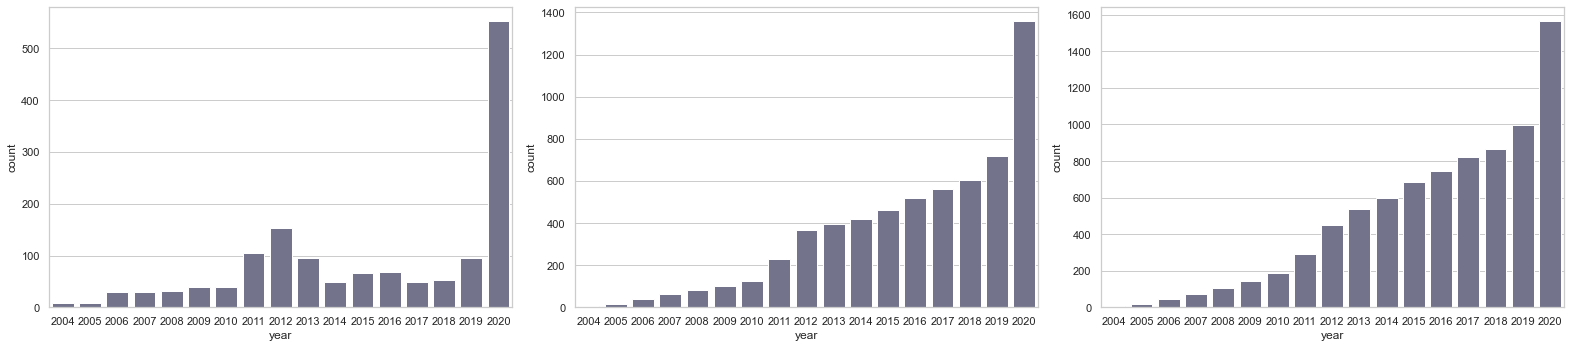

In [62]:
# BCP開示初年度の分布
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(22, 5))
sns.countplot(data=bcp.query('BCP_first == 1'), x='year', color='blue', saturation=0.1, ax=ax[0])
sns.countplot(data=bcp.query('BCP == 1'), x='year', color='blue', saturation=0.1, ax=ax[1])
sns.countplot(data=bcp.query('BCP_dev == 1'), x='year', color='blue', saturation=0.1, ax=ax[2])
plt.tight_layout()
plt.show()

In [63]:
# 要約統計量
r = list(range(1, 10, 1))
r = list(map(lambda x: x / 10, r))
df.describe(percentiles=r)

,stock_code,corporate_number,establishment,sales,operating_profit,net_profit,total_assets,cash,fixed_assets,total_liabilities,...,lag_b_foreign_stock_ratio,lag_b_turnover,lag_b_sensitivity_analysis,lag_b_turnover_cumsum,lag_b_sensitivity_analysis_cumsum,lag_b_BCP_cumsum,count,min,row,correct_year
count,31912.000000,3.191200e+04,31912.000000,3.191200e+04,31912.000000,31912.000000,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,...,31912.000000,31912.000000,31912.000000,31912.000000,31912.000000,31912.000000,31912.000000,31912.000000,31912.000000,31912.000000
mean,5912.091690,5.156485e+12,1957.350808,1.764204e+05,10076.655490,5623.128698,2.164948e+05,2.676536e+04,6.863637e+04,1.287318e+05,...,10.325723,0.111055,0.009056,0.778704,0.027450,0.589653,13.211394,2008.694504,5.769992,2014.464496
std,2397.423419,2.561603e+12,25.477588,5.668213e+05,35573.659737,23396.464033,1.086196e+06,8.920156e+04,3.016523e+05,9.491092e+05,...,11.604607,0.314206,0.094733,0.895835,0.318934,1.755257,2.912446,2.333045,4.018555,4.037716
min,1301.000000,1.010001e+12,1875.000000,8.000000e+00,-406119.000000,-456660.000000,1.920000e+02,1.100000e+01,2.000000e+00,4.000000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,2006.000000
10%,2432.000000,1.240001e+12,1924.000000,6.109200e+03,28.000000,-247.900000,6.741100e+03,1.146000e+03,6.921000e+02,2.460000e+03,...,0.179190,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2007.000000,1.000000,2009.000000
20%,3393.400000,2.210001e+12,1938.000000,1.101600e+04,306.200000,122.000000,1.221860e+04,1.924000e+03,2.195000e+03,4.655400e+03,...,0.825320,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,2008.000000,2.000000,2010.000000
30%,4350.000000,3.180001e+12,1947.000000,1.778950e+04,628.000000,316.000000,1.861060e+04,2.978000e+03,3.902000e+03,7.531200e+03,...,1.950411,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2008.000000,3.000000,2012.000000
40%,5214.000000,4.130001e+12,1949.000000,2.643080e+04,1036.000000,572.000000,2.699440e+04,4.416400e+03,6.225400e+03,1.092700e+04,...,3.594948,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2008.000000,4.000000,2013.000000
50%,6262.000000,5.120001e+12,1953.000000,3.828150e+04,1665.000000,955.000000,3.921950e+04,6.346500e+03,9.573500e+03,1.677600e+04,...,5.954349,0.000000,0.000000,1.000000,0.000000,0.000000,14.000000,2008.000000,5.000000,2015.000000
60%,6803.000000,6.017361e+12,1962.000000,5.523220e+04,2674.600000,1584.000000,5.736920e+04,9.372200e+03,1.457940e+04,2.537200e+04,...,9.247800,0.000000,0.000000,1.000000,0.000000,0.000000,14.000000,2008.000000,7.000000,2016.000000


In [64]:
# 要約統計量
r = list(range(0, 100, 10))
r = list(map(lambda x: x / 100, r))
summary = df_yj.loc[:, [
    'year',
    'prefecture', 'indname_small', 'indname_large', 'yj_sales_growth',
    'yj_total_assets', 'yj_operating_cash_flow', 'yj_ros',
    'yj_cash_deposit_ratio', 'yj_leverage', 'yj_stock_price_growth',
    'yj_net_profit_growth', 'yj_firm_age', 'yj_fixed_assets_ratio',
    ]]
# summary.describe(percentiles=r)
summary.describe()

,year,yj_sales_growth,yj_total_assets,yj_operating_cash_flow,yj_ros,yj_cash_deposit_ratio,yj_leverage,yj_stock_price_growth,yj_net_profit_growth,yj_firm_age,yj_fixed_assets_ratio
count,31912.000000,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04,3.191200e+04
mean,2014.464496,-1.781255e-18,1.674380e-15,2.850008e-17,-4.453138e-17,2.137506e-17,1.246879e-15,2.671883e-18,-1.319242e-17,-2.850008e-17,-7.125021e-17
std,4.037716,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00
min,2006.000000,-1.056283e+01,-4.763884e+00,-1.191074e+01,-8.727982e+00,-2.555266e+00,-2.348755e+00,-4.594963e+00,-9.745800e+01,-2.367729e+00,-1.907143e+00
25%,2011.000000,-3.382297e-01,-6.600719e-01,-2.270995e-01,-4.070143e-01,-7.016601e-01,-8.030067e-01,-4.685264e-01,-1.287609e-02,-6.519780e-01,-7.072646e-01
50%,2015.000000,5.363086e-02,-8.381569e-03,-1.749180e-01,-1.470892e-01,2.629060e-03,-3.898325e-02,5.728180e-02,1.098408e-02,1.367208e-01,-3.844986e-02
75%,2018.000000,4.114253e-01,6.572602e-01,-1.704340e-02,2.386849e-01,6.904176e-01,7.552613e-01,5.190257e-01,2.660454e-02,5.968060e-01,7.219094e-01
max,2021.000000,1.111235e+01,3.358669e+00,1.151818e+01,1.547232e+01,3.049527e+00,2.530462e+00,3.875144e+00,7.908895e+01,3.087937e+00,2.478389e+00


In [65]:
# カテゴリカルデータ
df.describe(exclude='number')

,firm_name,fiscal_year,status,prefecture,ceo,accounting,ceo_new,indname_small,indname_large,lag_ceo,lag_accounting,lag_prefecture
count,31912,31912,31912,31912,31912,31912,31912,31912,31912,31912,31912,31912
unique,3124,173,1,46,6226,3,6226,32,16,6205,3,46
top,アトムリビンテック,2014/03,上場,東京都,伊藤 守,日本,伊藤 守,卸売業,情報通信・サービスその他,伊藤 守,日本,東京都
freq,15,1701,31912,17221,23,31376,23,3287,6474,22,31508,17221


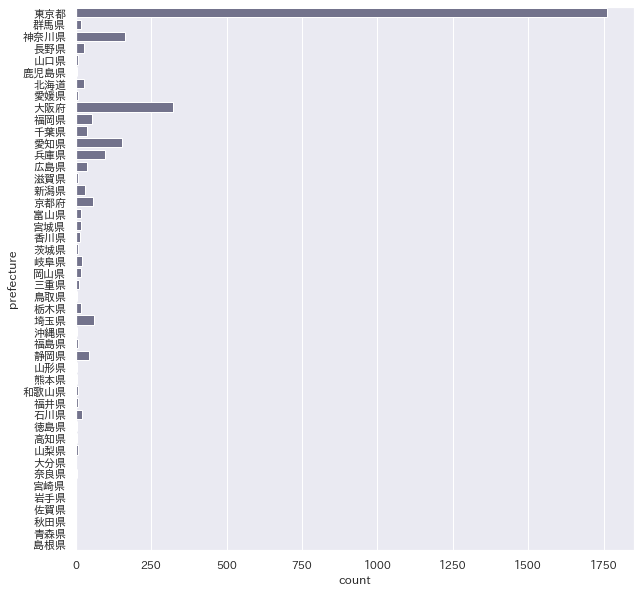

In [66]:
# prefecture
prefecture = df_yj.drop_duplicates(subset=['stock_code'])
sns.set(font='IPAexGothic')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=prefecture, y='prefecture', color='blue', saturation=0.1)
plt.show()

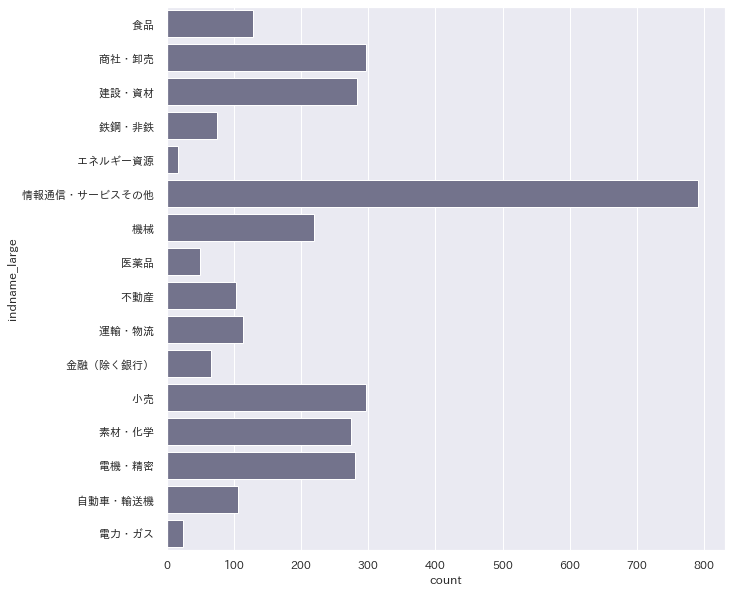

In [67]:
# industry
industry = df_yj.drop_duplicates(subset=['stock_code'])
sns.set(font='IPAexGothic')
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(data=industry, y='indname_large', color='blue', saturation=0.1)
plt.show()

In [68]:
# 日付データ
y = df['year']
y.describe()

count    31912.000000
mean      2014.464496
std          4.037716
min       2006.000000
25%       2011.000000
50%       2015.000000
75%       2018.000000
max       2021.000000
Name: year, dtype: float64

In [69]:
df.columns

Index(['stock_code', 'corporate_number', 'firm_name', 'fiscal_year', 'status',
       'establishment', 'prefecture', 'ceo', 'accounting', 'sales',
       ...
       'lag_b_foreign_stock_ratio', 'lag_b_turnover',
       'lag_b_sensitivity_analysis', 'lag_b_turnover_cumsum',
       'lag_b_sensitivity_analysis_cumsum', 'lag_b_BCP_cumsum', 'count', 'min',
       'row', 'correct_year'],
      dtype='object', length=187)

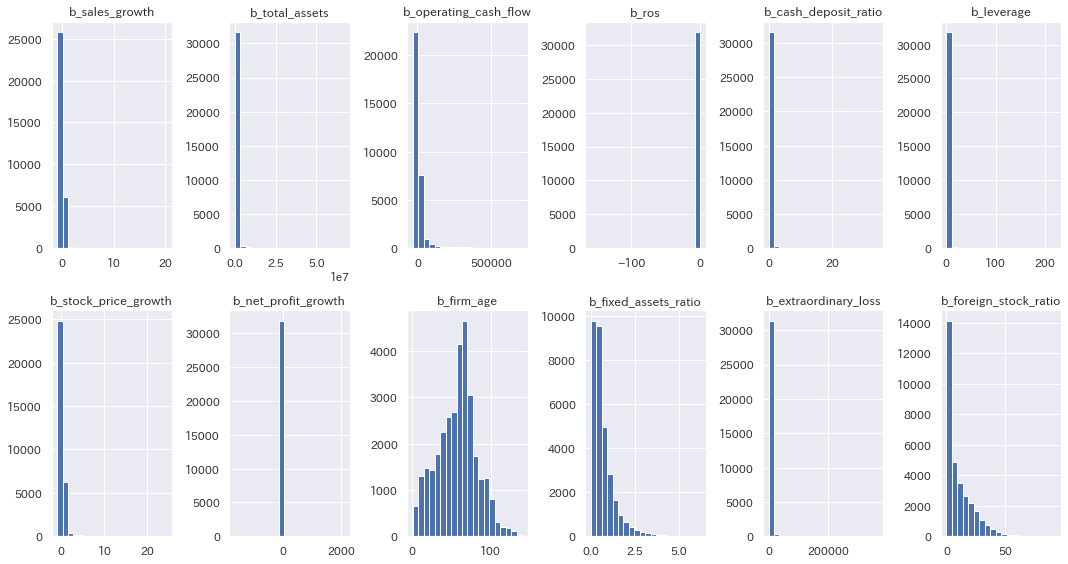

In [70]:
h = df[[
    'b_sales_growth', 'b_total_assets', 'b_operating_cash_flow', 'b_ros', 'b_cash_deposit_ratio', 'b_leverage', 
    'b_stock_price_growth', 'b_net_profit_growth', 'b_firm_age', 'b_fixed_assets_ratio', 'b_extraordinary_loss', 
    'b_foreign_stock_ratio'
    ]]

def draw_hist(s, row, col, q_min=0, q_max=1):
    qmin = s.quantile(q_min)
    qmax = s.quantile(q_max)
    s2 = s[(qmin <= s) & (s <= qmax)]
    axes[row][col].set_title(s2.name)
    axes[row][col].hist(s2, bins=20)

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))
k = 0
for i in range(2):
    for j in range(6):
        s = h.iloc[:, k]
        draw_hist(s=s, row=i, col=j)
        k += 1

plt.tight_layout()

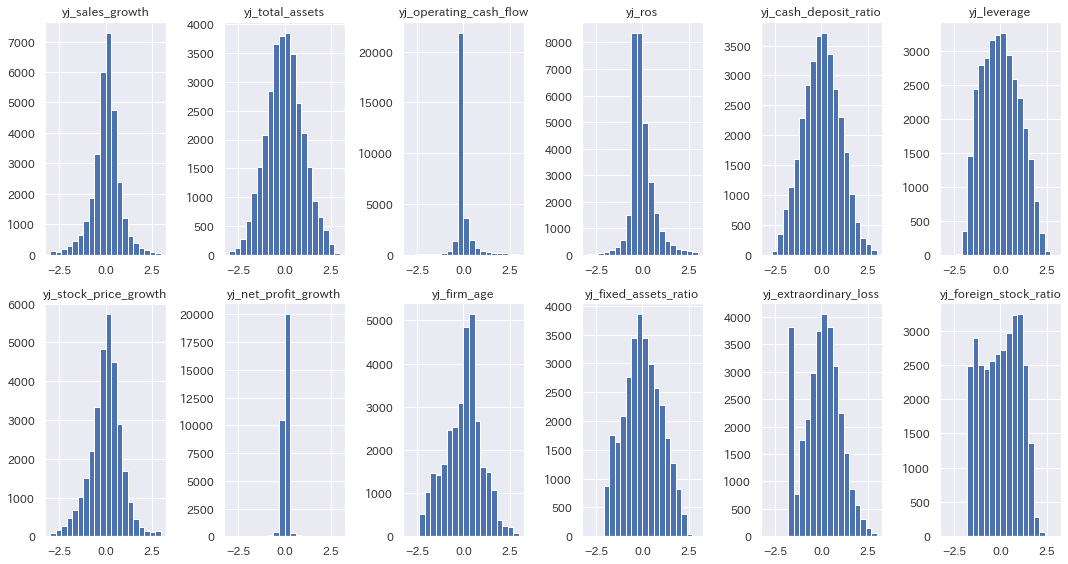

In [71]:
def draw_hist(s, row, col, q_min=0, q_max=1, x_min=-2, x_max=2):
    qmin = s.quantile(q_min)
    qmax = s.quantile(q_max)
    s2 = s[(qmin <= s) & (s <= qmax)]
    axes[row][col].set_title(s2.name)
    axes[row][col].hist(s2, range=(x_min, x_max), bins=20)

cols = [c for c in df_yj.columns if ('yj_' in c) & ~('lag_' in c)]
h = df_yj[cols]
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 8))
k = 0
for i in range(2):
    for j in range(6):
        s = h.iloc[:, k]
        draw_hist(s=s, row=i, col=j, x_min=-3, x_max=3)
        k += 1

plt.tight_layout()

<AxesSubplot:>

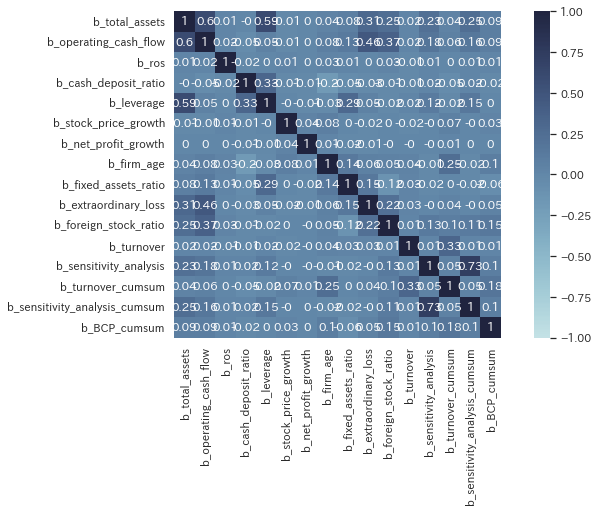

In [72]:
# 調整前相関行列
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cols = [c for c in df.columns if c.startswith('b_')]
cols.remove('b_sales_growth')
corr = df[cols].corr(method='pearson')
corr = corr.apply(lambda x: round(x, 2))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, vmax=1, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

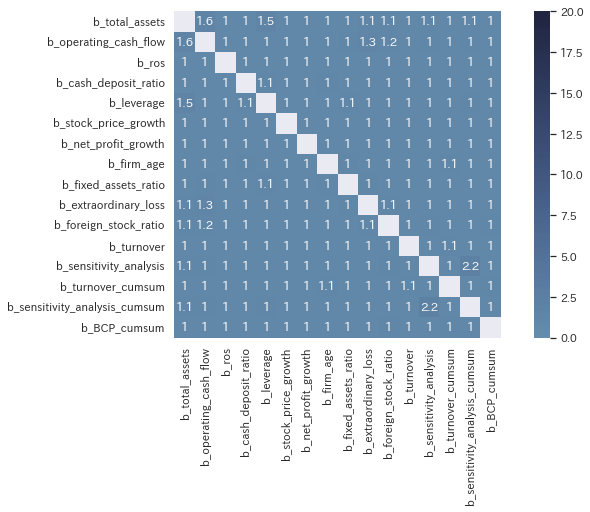

In [73]:
# 調整前VIF統計量
cols = [c for c in df.columns if c.startswith('b_')]
cols.remove('b_sales_growth')
corr = df[cols].corr(method='pearson')
vif = corr.apply(lambda x: x.apply(lambda y: 1 / (1 - math.pow(y, 2) if not y == 1 else np.nan)))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(vif, annot=True, center=1, vmin=0, vmax=20, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

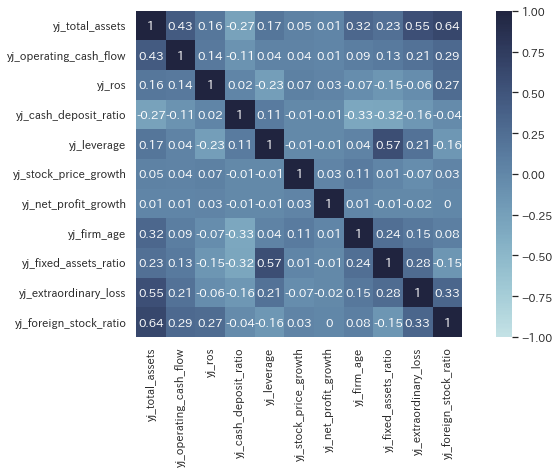

In [74]:
# 調整後相関行列
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cols = [c for c in df_yj.columns if c.startswith('yj_')]
cols.remove('yj_sales_growth')
corr = df_yj[cols].corr(method='pearson')
corr = corr.apply(lambda x: round(x, 2))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, center=0, vmin=-1, vmax=1, ax=ax, cmap=cmap, square=True)

<AxesSubplot:>

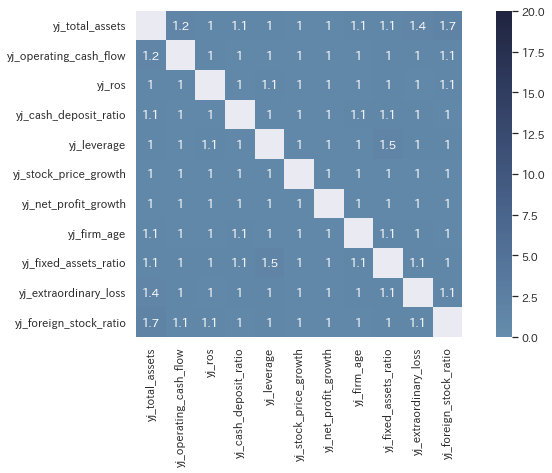

In [75]:
# 調整後VIF統計量
cols = [c for c in df_yj.columns if c.startswith('yj_')]
cols.remove('yj_sales_growth')
corr = df_yj[cols].corr(method='pearson')
vif = corr.apply(lambda x: x.apply(lambda y: 1 / (1 - math.pow(y, 2) if not y == 1 else np.nan)))
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(vif, annot=True, center=1, vmin=0, vmax=20, ax=ax, cmap=cmap, square=True)